In [1]:
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torchvision import transforms, models
from tqdm import tqdm
import random
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch.distributions as dist
import os
from density_estimation import *
from nonlinear_vae import *
from custom_data_loading import *
from train_vae import *
from distance_correlation import *
from spearman_correlation import *
import re

In [2]:
UC_t=report_tensor_list('/kaggle/input/mixed-stress-path/Set_III_UCTensors/')[5000:10000]
UT_t=report_tensor_list('/kaggle/input/mixed-stress-path/Set_III_Tensors/')[5000:10000]
SH_t=report_tensor_list('/kaggle/input/mixed-stress-path/Set_III_SHTensors/')[5000:10000]
file_list=UC_t+UT_t+SH_t

print('The data set size:',len(file_list))

train_list,test_list=list_splitting(file_list,proportion=0.2,shuffle=True)

The data set size: 15000


In [3]:
model_dict=torch.load('/kaggle/input/125-epoch-model/0628_SkVAE_SP_zShape32.pth',map_location='cpu')
model=model_dict['Trained_model']
param=model_dict['Trained_param']
past_cost_history=model.cost_dict

In [4]:
lr=0.00001
param['lr']=lr
param['max_epoch']=125
param['batch_sz']=64
param['optimizor']=optim.Adam(model.parameters(),lr=lr,weight_decay=0.00025)

In [5]:
device="cuda" if torch.cuda.is_available() else "cpu"

model.to(device)

NonLinearVAE(
  (Encoder_CNN): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=1.02)
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): LeakyReLU(negative_slope=1.02)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): LeakyReLU(negative_slope=1.02)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): Tanhshrink()
    (9): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): Tanhshrink()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Encoder_fc): Sequential(
    (0): Linear(in_features=80000, out_features=2048, bias=True)
    (Activate0): LeakyReLU(negative_slope=1.02)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (Activate1): LeakyReLU(negative_s

In [6]:
torch.autograd.set_detect_anomaly(True)
trained_M=VAE_list_trainer(model,train_list,test_list,param)

The adopted loss: <function elbo_loss_SC at 0x7e0999cb83a0>


Epoch:   0%|          | 0/125 [00:00<?, ?it/s]

Iteration in Epoch:1:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6799.02880859375,MSE:4978.30126953125,Reg1:272.6701354980469,Reg2:100.27171325683594


Iteration in Epoch:2:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6656.853515625,MSE:4685.2626953125,Reg1:303.9936828613281,Reg2:105.96099853515625


Iteration in Epoch:3:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6724.44580078125,MSE:4820.47900390625,Reg1:282.1341857910156,Reg2:105.75640869140625


Iteration in Epoch:4:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6493.6875,MSE:4694.7451171875,Reg1:270.8519287109375,Reg2:98.6386489868164


Iteration in Epoch:5:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6501.9521484375,MSE:4742.13525390625,Reg1:267.77105712890625,Reg2:95.65037536621094


Iteration in Epoch:6:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6342.69287109375,MSE:4460.12451171875,Reg1:276.0682678222656,Reg2:105.43636322021484


Iteration in Epoch:7:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6290.99658203125,MSE:4421.5830078125,Reg1:290.0479431152344,Reg2:99.92701721191406


Iteration in Epoch:8:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6271.43994140625,MSE:4485.484375,Reg1:268.05047607421875,Reg2:98.18040466308594


Iteration in Epoch:9:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6548.955078125,MSE:4713.806640625,Reg1:280.96734619140625,Reg2:99.22463989257812


Iteration in Epoch:10:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6376.65283203125,MSE:4539.94921875,Reg1:273.10589599609375,Reg2:101.73856353759766


Iteration in Epoch:11:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6200.24267578125,MSE:4298.7333984375,Reg1:301.48052978515625,Reg2:99.70677947998047


Iteration in Epoch:12:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6203.62109375,MSE:4414.72216796875,Reg1:261.4413146972656,Reg2:100.45751953125


Iteration in Epoch:13:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6476.7958984375,MSE:4598.6953125,Reg1:282.3040466308594,Reg2:103.11886596679688


Iteration in Epoch:14:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6343.11865234375,MSE:4478.59765625,Reg1:280.7929382324219,Reg2:102.21420288085938


Iteration in Epoch:15:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6477.63720703125,MSE:4618.6767578125,Reg1:282.9034423828125,Reg2:101.02500915527344


Iteration in Epoch:16:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6450.6552734375,MSE:4555.5068359375,Reg1:289.54290771484375,Reg2:102.65192413330078


Iteration in Epoch:17:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6175.68798828125,MSE:4416.5751953125,Reg1:265.461181640625,Reg2:96.27289581298828


Iteration in Epoch:18:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6513.86962890625,MSE:4764.3193359375,Reg1:259.8086242675781,Reg2:97.012451171875


Iteration in Epoch:19:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6060.12646484375,MSE:4182.1552734375,Reg1:294.7955322265625,Reg2:99.35842895507812


Iteration in Epoch:20:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5970.06640625,MSE:4105.2294921875,Reg1:282.52264404296875,Reg2:101.7269287109375


Iteration in Epoch:21:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5725.71484375,MSE:3910.9033203125,Reg1:287.43927001953125,Reg2:95.24935913085938


Iteration in Epoch:22:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6178.45947265625,MSE:4205.1826171875,Reg1:315.0849304199219,Reg2:102.80220031738281


Iteration in Epoch:23:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6403.57373046875,MSE:4542.1015625,Reg1:289.2703857421875,Reg2:99.36611938476562


Iteration in Epoch:24:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5947.361328125,MSE:4093.685546875,Reg1:305.58697509765625,Reg2:93.69149017333984


Iteration in Epoch:25:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6214.48681640625,MSE:4442.5927734375,Reg1:285.67498779296875,Reg2:91.48690795898438


Iteration in Epoch:26:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5919.623046875,MSE:4016.362548828125,Reg1:304.08648681640625,Reg2:99.10009765625


Iteration in Epoch:27:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6147.0263671875,MSE:4223.94189453125,Reg1:298.7683410644531,Reg2:102.67794036865234


Iteration in Epoch:28:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6274.9970703125,MSE:4303.7490234375,Reg1:322.07470703125,Reg2:100.50238800048828


Iteration in Epoch:29:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5994.9296875,MSE:4028.630126953125,Reg1:307.0565185546875,Reg2:104.51301574707031


Iteration in Epoch:30:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6222.0244140625,MSE:4161.54296875,Reg1:330.235107421875,Reg2:106.9776611328125


Iteration in Epoch:31:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6019.984375,MSE:4138.10986328125,Reg1:302.84368896484375,Reg2:97.3343505859375


Iteration in Epoch:32:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5887.935546875,MSE:3843.669189453125,Reg1:321.3769226074219,Reg2:108.01355743408203


Iteration in Epoch:33:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6120.12353515625,MSE:4219.9765625,Reg1:298.48388671875,Reg2:100.46951293945312


Iteration in Epoch:34:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6052.8203125,MSE:4126.25927734375,Reg1:307.08355712890625,Reg2:100.53104400634766


Iteration in Epoch:35:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6365.2197265625,MSE:4321.71875,Reg1:328.5479431152344,Reg2:105.78572082519531


Iteration in Epoch:36:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5487.31103515625,MSE:3569.34521484375,Reg1:305.074462890625,Reg2:100.27427673339844


Iteration in Epoch:37:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6034.43017578125,MSE:4007.907958984375,Reg1:320.496337890625,Reg2:106.50331115722656


Iteration in Epoch:38:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5914.51953125,MSE:3998.08251953125,Reg1:318.19696044921875,Reg2:96.18461608886719


Iteration in Epoch:39:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5880.9716796875,MSE:3880.08642578125,Reg1:318.44677734375,Reg2:104.55449676513672


Iteration in Epoch:40:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5901.65283203125,MSE:4003.00244140625,Reg1:313.9435119628906,Reg2:95.68197631835938


Iteration in Epoch:41:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6042.998046875,MSE:4102.27685546875,Reg1:304.1207275390625,Reg2:102.83589172363281


Iteration in Epoch:42:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6008.486328125,MSE:4049.4716796875,Reg1:307.5056457519531,Reg2:103.64972686767578


Iteration in Epoch:43:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5731.4365234375,MSE:3744.45654296875,Reg1:327.2168273925781,Reg2:100.53297424316406


Iteration in Epoch:44:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6118.21337890625,MSE:4317.94580078125,Reg1:288.448486328125,Reg2:93.49221801757812


Iteration in Epoch:45:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5975.798828125,MSE:4100.4580078125,Reg1:290.8981628417969,Reg2:100.26465606689453


Iteration in Epoch:46:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6057.1650390625,MSE:4117.6953125,Reg1:307.88525390625,Reg2:101.58141326904297


Iteration in Epoch:47:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5973.8193359375,MSE:4156.54541015625,Reg1:290.0653381347656,Reg2:94.70779418945312


Iteration in Epoch:48:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6012.88916015625,MSE:3985.42626953125,Reg1:325.1396789550781,Reg2:105.20440673828125


Iteration in Epoch:49:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5954.025390625,MSE:3842.861572265625,Reg1:354.083251953125,Reg2:104.89138793945312


Iteration in Epoch:50:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5920.68798828125,MSE:3999.065185546875,Reg1:317.58392333984375,Reg2:96.88709259033203


Iteration in Epoch:51:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5985.74658203125,MSE:4122.75537109375,Reg1:294.275390625,Reg2:98.01649475097656


Iteration in Epoch:52:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5816.794921875,MSE:3950.8505859375,Reg1:292.06939697265625,Reg2:98.9736328125


Iteration in Epoch:53:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5688.16552734375,MSE:3660.201171875,Reg1:342.4605407714844,Reg2:100.05825805664062


Iteration in Epoch:54:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5529.12158203125,MSE:3602.627685546875,Reg1:303.475341796875,Reg2:101.60678100585938


Iteration in Epoch:55:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5697.3212890625,MSE:3729.0302734375,Reg1:310.27459716796875,Reg2:103.74671936035156


Iteration in Epoch:56:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6136.6640625,MSE:4223.09423828125,Reg1:307.8310241699219,Reg2:99.0076904296875


Iteration in Epoch:57:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5607.9482421875,MSE:3568.93408203125,Reg1:330.00653076171875,Reg2:104.89945983886719


Iteration in Epoch:58:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5916.12744140625,MSE:3906.313232421875,Reg1:335.11041259765625,Reg2:100.44827270507812


Iteration in Epoch:59:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5237.3681640625,MSE:3199.035888671875,Reg1:330.82440185546875,Reg2:104.58589935302734


Iteration in Epoch:60:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5829.79345703125,MSE:3869.76025390625,Reg1:312.6394958496094,Reg2:102.21145629882812


Iteration in Epoch:61:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5728.73388671875,MSE:3748.80419921875,Reg1:324.62615966796875,Reg2:100.60513305664062


Iteration in Epoch:62:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5945.70751953125,MSE:4012.867919921875,Reg1:309.4615173339844,Reg2:100.44551849365234


Iteration in Epoch:63:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5888.75830078125,MSE:3883.009765625,Reg1:323.3252868652344,Reg2:103.5772933959961


Iteration in Epoch:64:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5683.0556640625,MSE:3711.1748046875,Reg1:321.2917785644531,Reg2:100.80055236816406


Iteration in Epoch:65:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5971.12548828125,MSE:3948.914794921875,Reg1:334.5667724609375,Reg2:101.85101318359375


Iteration in Epoch:66:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5769.8974609375,MSE:3737.673095703125,Reg1:343.3513488769531,Reg2:100.217041015625


Iteration in Epoch:67:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5702.68505859375,MSE:3779.2841796875,Reg1:307.97369384765625,Reg2:99.947998046875


Iteration in Epoch:68:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5526.25537109375,MSE:3486.569091796875,Reg1:327.87615966796875,Reg2:105.60577392578125


Iteration in Epoch:69:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5542.53515625,MSE:3636.564453125,Reg1:312.1708068847656,Reg2:96.94579315185547


Iteration in Epoch:70:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5622.86328125,MSE:3624.028076171875,Reg1:322.2294921875,Reg2:103.21466064453125


Iteration in Epoch:71:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5558.87890625,MSE:3648.962646484375,Reg1:307.54718017578125,Reg2:98.72747802734375


Iteration in Epoch:72:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6040.296875,MSE:3993.42578125,Reg1:339.82342529296875,Reg2:102.7401123046875


Iteration in Epoch:73:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5360.5830078125,MSE:3393.013427734375,Reg1:327.9057922363281,Reg2:98.38517761230469


Iteration in Epoch:74:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5917.361328125,MSE:3963.255126953125,Reg1:308.111083984375,Reg2:102.977294921875


Iteration in Epoch:75:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5667.0751953125,MSE:3646.25048828125,Reg1:334.48687744140625,Reg2:101.7364501953125


Iteration in Epoch:76:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5830.5537109375,MSE:3794.7705078125,Reg1:331.70428466796875,Reg2:104.06704711914062


Iteration in Epoch:77:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5590.76904296875,MSE:3691.38671875,Reg1:315.821044921875,Reg2:95.19194030761719


Iteration in Epoch:78:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5595.3701171875,MSE:3709.61865234375,Reg1:289.73406982421875,Reg2:101.65495300292969


Iteration in Epoch:79:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5854.1240234375,MSE:3843.389892578125,Reg1:322.3050537109375,Reg2:104.38188171386719


Iteration in Epoch:80:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5297.5810546875,MSE:3298.538818359375,Reg1:327.7547302246094,Reg2:101.57785034179688


Iteration in Epoch:81:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5698.62939453125,MSE:3664.5146484375,Reg1:339.299072265625,Reg2:101.62171173095703


Iteration in Epoch:82:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5864.6513671875,MSE:3762.536376953125,Reg1:343.7366943359375,Reg2:107.09048461914062


Iteration in Epoch:83:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5753.30419921875,MSE:3745.81298828125,Reg1:324.45526123046875,Reg2:103.41255187988281


Iteration in Epoch:84:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5695.98779296875,MSE:3828.253662109375,Reg1:310.1300354003906,Reg2:93.73443603515625


Iteration in Epoch:85:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5621.2529296875,MSE:3564.83740234375,Reg1:346.2252197265625,Reg2:101.77400207519531


Iteration in Epoch:86:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5663.50634765625,MSE:3658.426513671875,Reg1:338.8680114746094,Reg2:98.84762573242188


Iteration in Epoch:87:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:6022.52490234375,MSE:3868.500732421875,Reg1:362.1897277832031,Reg2:106.74551391601562


Iteration in Epoch:88:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5689.06494140625,MSE:3657.951416015625,Reg1:335.3580322265625,Reg2:102.50394439697266


Iteration in Epoch:89:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5478.85595703125,MSE:3447.39990234375,Reg1:344.1352844238281,Reg2:99.90504455566406


Iteration in Epoch:90:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5972.5869140625,MSE:3847.91015625,Reg1:362.9688720703125,Reg2:103.5770263671875


Iteration in Epoch:91:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5935.177734375,MSE:3881.02392578125,Reg1:337.9776916503906,Reg2:104.0220718383789


Iteration in Epoch:92:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5461.4755859375,MSE:3516.697509765625,Reg1:323.4103088378906,Reg2:97.45467376708984


Iteration in Epoch:93:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5812.50634765625,MSE:3794.816650390625,Reg1:332.47528076171875,Reg2:102.02638244628906


Iteration in Epoch:94:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5416.55322265625,MSE:3464.27197265625,Reg1:322.1693420410156,Reg2:98.5772933959961


Iteration in Epoch:95:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5728.671875,MSE:3795.54736328125,Reg1:324.5689697265625,Reg2:95.94175720214844


Iteration in Epoch:96:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5903.859375,MSE:3926.084228515625,Reg1:326.1174011230469,Reg2:99.94230651855469


Iteration in Epoch:97:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5484.4052734375,MSE:3394.382080078125,Reg1:347.8551025390625,Reg2:104.64579010009766


Iteration in Epoch:98:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5401.73193359375,MSE:3461.923583984375,Reg1:309.0521240234375,Reg2:101.26520538330078


Iteration in Epoch:99:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5918.7177734375,MSE:3828.50390625,Reg1:346.9175720214844,Reg2:104.9460678100586


Iteration in Epoch:100:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5597.83740234375,MSE:3602.0224609375,Reg1:328.4837646484375,Reg2:101.03636169433594


Iteration in Epoch:101:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5641.45458984375,MSE:3726.91064453125,Reg1:306.104736328125,Reg2:99.62299346923828


Iteration in Epoch:102:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5558.68408203125,MSE:3693.416259765625,Reg1:300.6338806152344,Reg2:96.33663940429688


Iteration in Epoch:103:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5563.22900390625,MSE:3507.859375,Reg1:329.91864013671875,Reg2:106.56136322021484


Iteration in Epoch:104:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5352.14111328125,MSE:3261.87841796875,Reg1:345.5750732421875,Reg2:105.353759765625


Iteration in Epoch:105:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5527.13330078125,MSE:3474.566650390625,Reg1:347.5062255859375,Reg2:101.00476837158203


Iteration in Epoch:106:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5637.291015625,MSE:3659.14892578125,Reg1:326.79974365234375,Reg2:99.77427673339844


Iteration in Epoch:107:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5683.45849609375,MSE:3573.36669921875,Reg1:366.02825927734375,Reg2:101.20073699951172


Iteration in Epoch:108:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5618.962890625,MSE:3698.9150390625,Reg1:318.26556396484375,Reg2:96.52509307861328


Iteration in Epoch:109:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5495.01611328125,MSE:3567.48046875,Reg1:316.8723449707031,Reg2:97.69185638427734


Iteration in Epoch:110:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5798.6630859375,MSE:3799.87109375,Reg1:331.88018798828125,Reg2:100.31512451171875


Iteration in Epoch:111:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5669.1064453125,MSE:3675.751953125,Reg1:331.6129150390625,Reg2:99.8515625


Iteration in Epoch:112:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5446.876953125,MSE:3542.30126953125,Reg1:323.682373046875,Reg2:93.35284423828125


Iteration in Epoch:113:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5483.15869140625,MSE:3430.484375,Reg1:338.5212097167969,Reg2:103.71109008789062


Iteration in Epoch:114:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5197.755859375,MSE:3207.7138671875,Reg1:333.9561767578125,Reg2:98.81730651855469


Iteration in Epoch:115:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5719.66015625,MSE:3513.15576171875,Reg1:376.7396240234375,Reg2:107.62857818603516


Iteration in Epoch:116:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5606.66064453125,MSE:3482.306884765625,Reg1:358.22320556640625,Reg2:104.96841430664062


Iteration in Epoch:117:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5573.8125,MSE:3522.16845703125,Reg1:344.32275390625,Reg2:101.86759185791016


Iteration in Epoch:118:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5670.5888671875,MSE:3519.414306640625,Reg1:365.95465087890625,Reg2:105.33104705810547


Iteration in Epoch:119:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5512.0751953125,MSE:3553.30322265625,Reg1:326.60821533203125,Reg2:97.89469909667969


Iteration in Epoch:120:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5128.41943359375,MSE:3179.922119140625,Reg1:324.38299560546875,Reg2:97.53480529785156


Iteration in Epoch:121:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5489.3994140625,MSE:3439.507080078125,Reg1:341.02789306640625,Reg2:102.68087768554688


Iteration in Epoch:122:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5435.8369140625,MSE:3350.9814453125,Reg1:341.86334228515625,Reg2:105.92657470703125


Iteration in Epoch:123:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5559.123046875,MSE:3458.942626953125,Reg1:350.7119140625,Reg2:104.80449676513672


Iteration in Epoch:124:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5466.82080078125,MSE:3358.541015625,Reg1:365.457763671875,Reg2:101.190673828125


Iteration in Epoch:125:   0%|          | 0/187 [00:00<?, ?it/s]

Epoch loss:5336.0029296875,MSE:3299.751953125,Reg1:340.515380859375,Reg2:101.47052001953125


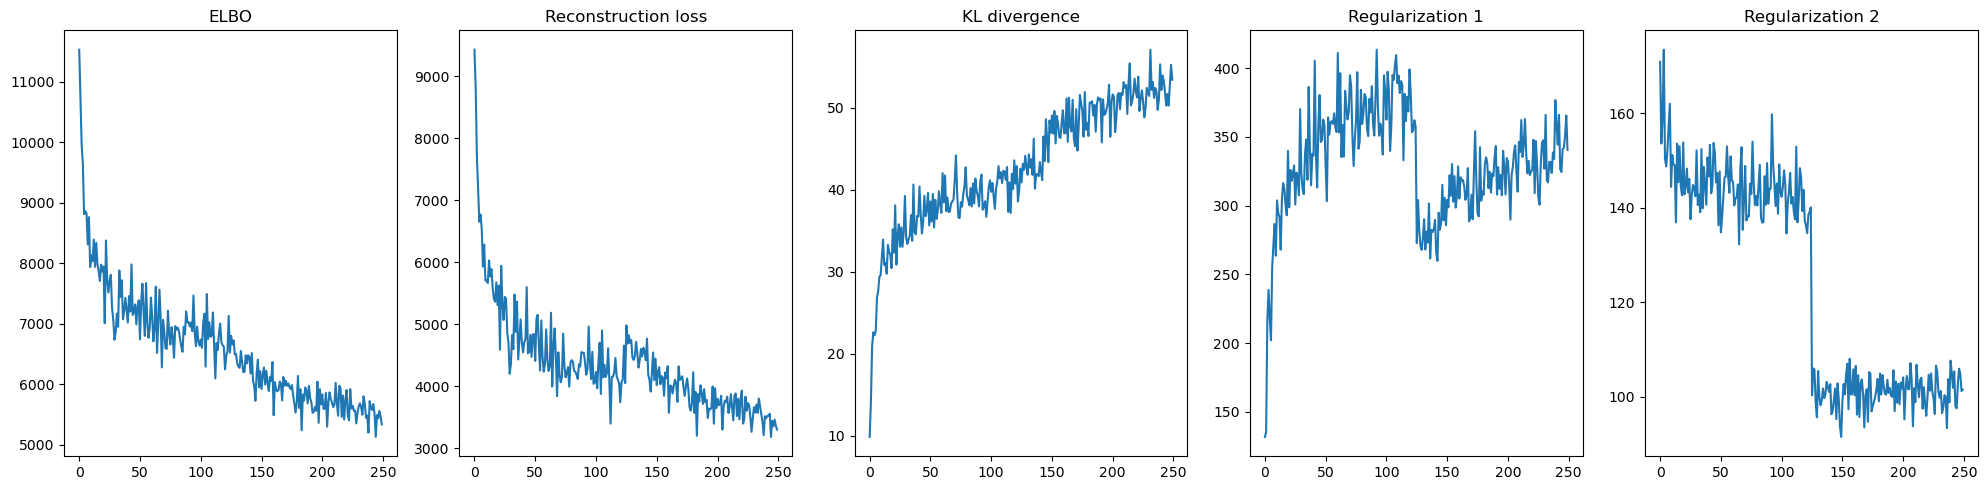

In [22]:
plot_loss_reg_VAE(trained_M,mode='Training_only')

In [14]:
total_cost_dict={}
current_cost=trained_M.cost_dict
for key,item in past_cost_history.items():
    total_cost_dict[key]=item+current_cost[key]
trained_M.cost_dict=total_cost_dict

In [21]:
trained_M.cost_dict=total_cost_dict
plot_loss_reg_VAE(trained_M,mode='Training_only')

In [23]:
profile = {'Trained_model':trained_M,\
            'Trained_param':param,\
           'state_dict': trained_M.state_dict(),
          }
torch.save(profile,'0701_secondtraining_1.pth')